<h2 align=center>Data Modeling and Fitting with Generated Data (Multiple Linear Regression)</h2>
<h2 align=center>Ben Bland</h2>

In [1]:
#Importing necessary packages

%matplotlib inline
import numpy as np
from sklearn import linear_model
from sklearn.datasets.samples_generator import make_regression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#Generating synthetic data for training and testing. 100 samples with two imput features
X,y = make_regression(n_samples=100, n_features=2, n_informative=1, random_state=0, noise=50)

#x and y are values for 3D space

X_train, X_test = X[:80], X[-20:]
y_train, y_test = y[:80], y[-20:]

#creating instance of model
regr = linear_model.LinearRegression()

#fitting the model to the training data
regr.fit(X_train,y_train)

#printing the coefficients
print(regr.coef_)
#print(X_train[:,0])
#print(X_train.shape)

[-10.25691752  90.5463984 ]


<h2>Predicting y-value based on the training</h2>

In the code below, we are creating an array to see how well our model can predict a y-value based on it's previous training. Both the predicted y-value and accuracy percentage will be printed.

In [2]:
#Predicting y-value based on the training

X1=np.array([1.2,4])
#reshape the array so numpy can use it
X1=np.reshape(X1, (1,-1))

print('Prediction: ',regr.predict(X1))

print('\n Accuracy Score: ',regr.score(X_test,y_test))

Prediction:  [ 350.86036386]

 Accuracy Score:  0.949827492261


<h2>Creating 3D Plots with MatPlotLib</h2>

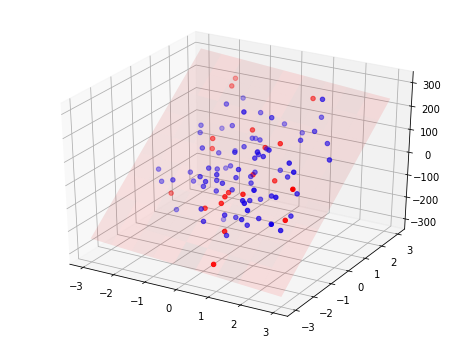

In [3]:
#Data
#define an inline function (using lambda) with coefficient variables
#returned from the regression analysis
coef=regr.coef_
line=lambda x1, x2: coef[0]*x1 + coef[1]*x2

#plotting
fig = plt.figure(figsize=(8,6))
grid_x1, grid_x2 = np.mgrid[-3:3:10j, -3:3:10j]
ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, facecolor='blue')
ax.scatter(X_test[:,0], X_test[:,1], y_test, facecolor='red')
ax.plot_surface(grid_x1, grid_x2, line(grid_x1, grid_x2), alpha=0.1, color='red')


We can then save this plot as a .pdf file with the code below...

In [4]:
#%matplotlib inline
#plt.show()
fig.savefig('scikits_MRLab.pdf', bbox='tight')